# IS509 Assignment 1

### Due: November 14, Sunday-23.59

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_1.ipynb (e.g., “e123456_HW_1.ipynb”).
- Late submissions will be accepted by November 17, 2021, 23:59 with a 5% per day penalty.
- Do not change variable names in the code blocks and the texts in the markdowns.
- **<font color=#C91414>This is an individual assignment. Please do not collaborate. You have to adhere to the academic integrity principles.</font>** 
- You are supposed to be able to interpret your findings. Therefore, you should not find a number or result and just leave it. You also need to comment on your findings by giving as much as **necessary** details.

------------

### The aim of this assignment is getting you familiar with
- Python and Jupyter notebook
- simple data cleaning
- descriptive statistics interpretation and
- visualizing methods


**1. Import pandas, numpy, matplotlib and seaborn libraries.**  
If you need another library or packages, you may upload them too.

In [1]:
from scipy import stats
import statsmodels.api as sm 
import pylab as py 

### answer ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Upload the data as a pandas dataframe and show the first three rows.**

In [2]:
### answer ###
df = pd.read_csv('./data.csv')
df.head(3)

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,Moderate,B,15.01,685.0,1,97.0,yes,22.4,23.3,384.8
1,4,Moderate,D,0.19,373.0,2,180.0,no,21.1,21.2,1182.2
2,2,Moderate,C,19.37,635.0,1,135.0,yes,25.4,27.3,469.1


----------
### Data Explanation

**number_of_room:** number of room in the house    
**neighbourhood:** the score for the neighbourhood (very low, low, moderate, high, very high)    
**material_quality:** the material quality of the house    
**age:** age of the house (in years)    
**distance:** the distance to the nearest public transportation (in meters)     
**number_of_bathroom:** number of bathroom   
**area:** house area      
**balcony:** Does the house have a balcony?
**thermal_insulation_point:** score for thermal insulation    
**air_quality:** air quality in the neighbourhood    
**price:** price of the house (in USD K)    
     

**3. How many features and observations are there in the data set (rows x columns)?**

In [3]:
### answer ###
print(f"data shape(row, columns) : {df.shape}")
print(f"Number of features : {df.shape[1]}")
print(f"Number of observations : {df.shape[0]}")

data shape(row, columns) : (3000, 11)
Number of features : 11
Number of observations : 3000


### <span style="background-color:#C91414">Usually you need to deal with low quality data </span> 

**4.Change encoding of the neighbourhood, material_quality and balcony as stated below.**       
For neighbourhood; Very Low=1, Low=2, Moderate=3, High=4, Very High=5   
For material_quality; A=1, B=2, C=3, D=4   
For balcony; no=0 , yes=1  

In [4]:
df[df['neighbourhood'].isna()]

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
290,1,NaN,A,6.53,664.0,1,54.0,yes,28.4,36.9,434.7
389,3,NaN,C,28.81,675.0,1,134.0,yes,22.0,29.3,347.9
754,3,NaN,A,30.07,691.0,1,77.0,yes,21.5,34.1,310.6
1008,3,NaN,A,20.44,630.0,1,69.0,yes,29.5,37.6,407.1
1048,1,NaN,C,9.19,615.0,1,62.0,yes,38.6,33.0,623.1
1204,3,NaN,B,10.06,582.0,1,120.0,yes,82.0,24.9,745.6
1277,2,NaN,D,26.51,693.0,1,73.0,yes,79.3,50.4,303.0
1780,4,NaN,A,7.70,222.0,2,145.0,yes,76.3,22.7,761.1
1825,3,NaN,B,13.94,631.0,1,82.0,yes,82.6,23.3,598.7
1919,3,NaN,B,19.68,679.0,1,130.0,yes,73.9,26.7,497.4


In [5]:
### answer ###
neigh_dict = {"Very Low":1, "Low":2, "Moderate":3, "High":4, "Very High":5}
mat_quality_dict = {"A":1,"B":2,"C":3,"D":4}
balcony_dict = {"yes":1, "no":0}

def make_numeric(s_dict, string):
    try:
        return s_dict[string]
    except:
        return np.nan

df["neighbourhood"] = df["neighbourhood"].apply(lambda x: make_numeric(neigh_dict, x))
df["material_quality"] = df["material_quality"].apply(lambda x: make_numeric(mat_quality_dict, x))
df["balcony"] = df["balcony"].apply(lambda x: make_numeric(balcony_dict, x))


In [6]:
data = df
data.head()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,3.0,2.0,15.01,685.0,1,97.0,1.0,22.4,23.3,384.8
1,4,3.0,4.0,0.19,373.0,2,180.0,0.0,21.1,21.2,1182.2
2,2,3.0,3.0,19.37,635.0,1,135.0,1.0,25.4,27.3,469.1
3,3,3.0,2.0,24.44,671.0,1,122.0,0.0,30.0,50.7,325.8
4,4,5.0,1.0,4.20,635.0,2,157.0,1.0,24.8,41.4,734.2


Notice that although some columns contain numerical values, sometimes they are not reflected in the describe() method. The reason of this, these columns are read as strings. If you face this problem, to fix it,  please run the below code.
> data= data.apply(pd.to_numeric)
   
Please be aware that the numeric encoding of a column does not mean that the variable/attribute itself is numerical.  


**5.Rename the name of "air_quality" column as "air_quality_score"**

In [7]:
data= data.apply(pd.to_numeric)
print(data.columns) ## .columns returns the column names of the DataFrame.   

Index(['number_of_room', 'neighbourhood', 'material_quality', 'age',
       'distance', 'number_of_bathroom', 'area', 'balcony',
       'thermal_insulation_point', 'air_quality', 'price'],
      dtype='object')


In [8]:
### answer ###
data.rename(columns={"air_quality": "air_quality_score"}, inplace=True)

In [9]:
data.head()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality_score,price
0,3,3.0,2.0,15.01,685.0,1,97.0,1.0,22.4,23.3,384.8
1,4,3.0,4.0,0.19,373.0,2,180.0,0.0,21.1,21.2,1182.2
2,2,3.0,3.0,19.37,635.0,1,135.0,1.0,25.4,27.3,469.1
3,3,3.0,2.0,24.44,671.0,1,122.0,0.0,30.0,50.7,325.8
4,4,5.0,1.0,4.20,635.0,2,157.0,1.0,24.8,41.4,734.2


Notice that some data points are missing. For example, see the value of the balcony by typing **print(data.iloc[64])**    
**6. Find and print the number of missing values in each column**

In [10]:
print(data.iloc[64])
### answer ###

for col_name in data.columns:
    print(f"Number of missing values for {col_name} : {data[col_name].isnull().sum()}")

number_of_room                2.00
neighbourhood                 3.00
material_quality              2.00
age                          24.25
distance                    681.00
number_of_bathroom            1.00
area                         86.00
balcony                        NaN
thermal_insulation_point     32.50
air_quality_score            35.30
price                       298.40
Name: 64, dtype: float64
Number of missing values for number_of_room : 0
Number of missing values for neighbourhood : 12
Number of missing values for material_quality : 55
Number of missing values for age : 0
Number of missing values for distance : 0
Number of missing values for number_of_bathroom : 0
Number of missing values for area : 0
Number of missing values for balcony : 316
Number of missing values for thermal_insulation_point : 23
Number of missing values for air_quality_score : 0
Number of missing values for price : 0


**7. Drop the columns which have more than %10 missing value rate.**

In [11]:
### answer ###
for col_name in data.columns:
    missing_value_ratio = data[col_name].isnull().sum()/len(data)
    if missing_value_ratio > 0.1:
        data.drop(columns=[col_name], inplace=True)
        print(f"Dropped column : {col_name} Since it has missing value ratio : {missing_value_ratio}")


Dropped column : balcony Since it has missing value ratio : 0.10533333333333333


**8. Create a dataframe named data_wo_na by dropping the rows which have missing values.  
What is the shape (rows x columns) of newly created data frame "data_wo_na"?**   
Please do the rest of the assignment with data_wo_na.

In [12]:
### answer ###
data_wo_na = data.dropna(axis=0, how='any')
print(f"data_wo_na shape(row, columns) : {data_wo_na.shape}")

data_wo_na shape(row, columns) : (2910, 10)


**9. Summarize and briefly interpret the data with appropriate descriptive statistics.  
Comment on the distribution of the attributes (bell-shaped, left-skewed, right-skewed, or how peaked etc.) <font color=#C91414> just by looking at descriptive statistics.</font> 
While answering Q10, you may want to revise your comments.**    
Hint: The purpose of this question is to measure whether you can comment on the distribution of data by looking at descriptive statistics. 
However, just looking at the descriptive statistics is not always enough. For this reason, it is stated that after answering Q10 (after visualizing the data), you may want to revise your comments.

**Answer**

*mean* > *median (50%)* then it may be right-skewed 

*mean* < *median (50%)* then it may be left-skewed. Therefore,

 - **number_of_room** : left-skewed
 - **neighbourhood** : left-skewed
 - **material_quality** : right-skewed
 - **age** : right-skewed
 - **distance** : left-skewed  
 - **number_of_bathroom** : right-skewed 
 - **area** : left-skewed
 - **thermal_insulation_point** : left-skewed
 - **air_quality_score** : right-skewed
 - **price** : right-skewed


In [13]:
### answer ###
data_wo_na.describe()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,thermal_insulation_point,air_quality_score,price
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,2.787285,3.656357,2.153265,14.519753,612.227148,1.240893,111.069072,59.844811,30.618522,629.725430
std,1.023500,1.149881,0.864813,10.136688,89.053838,0.427699,38.516978,27.326886,11.280134,217.144912
min,1.000000,1.000000,1.000000,0.020000,17.000000,1.000000,35.000000,20.600000,13.900000,114.900000
25%,2.000000,3.000000,1.000000,5.540000,579.000000,1.000000,76.000000,27.900000,22.900000,466.575000
50%,3.000000,4.000000,2.000000,13.215000,638.000000,1.000000,115.000000,73.300000,27.500000,610.350000
75%,4.000000,5.000000,3.000000,22.740000,675.000000,1.000000,141.000000,85.475000,35.175000,764.875000
max,4.000000,5.000000,4.000000,45.510000,740.000000,2.000000,190.000000,91.000000,99.600000,1298.500000


**10. Visualize the distributions of the numeric attributes. Comment whether they are similar to Gaussian/Normal distirbution or not. Give your reasons and support them with appropriate visualization techniques.**     
Support your answer with what you found in the previous question.
Hint: You can use subplotting to see the several plots of same attribute at a one time.

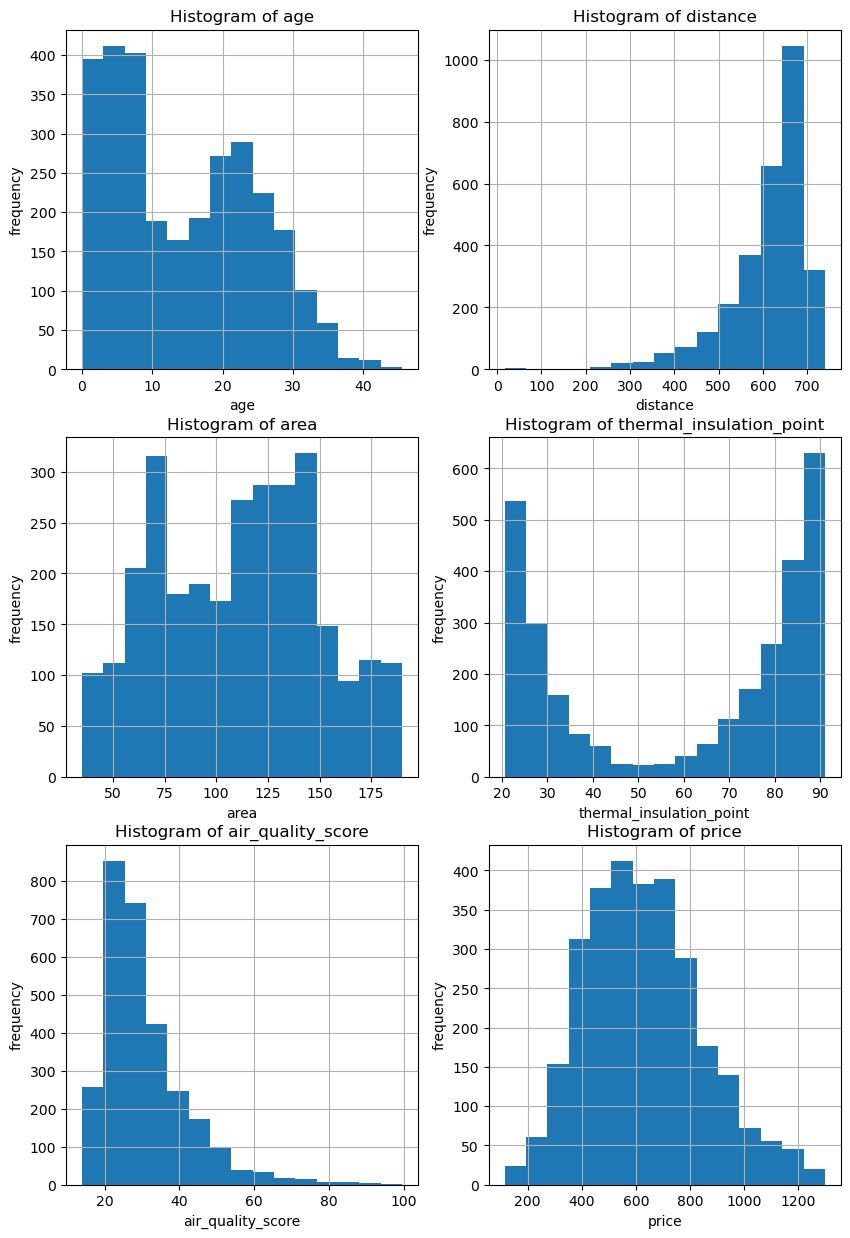

In [14]:
rows = 3
columns = 2
f, axes = plt.subplots(rows,columns, figsize=(10, 15))
numeric_cols = [col for col in data_wo_na.columns if col not in ["number_of_room", "neighbourhood", "material_quality" , "number_of_bathroom"]]
count=0
for i in range(rows):
    for j in range(columns): 
        col = numeric_cols[count]
#         ax = data_wo_na[col].hist(bins=25)
        axes[i,j].set_title(f"Histogram of {col}")
        axes[i,j].set_ylabel(f"frequency")
        axes[i,j].set_xlabel(col)
        axes[i,j].hist(data_wo_na.loc[:,col], bins =15)
        axes[i,j].grid(True)
#         axes[i,j].boxplot(data_wo_na.iloc[:,count])
        count=count+1 
plt.show()

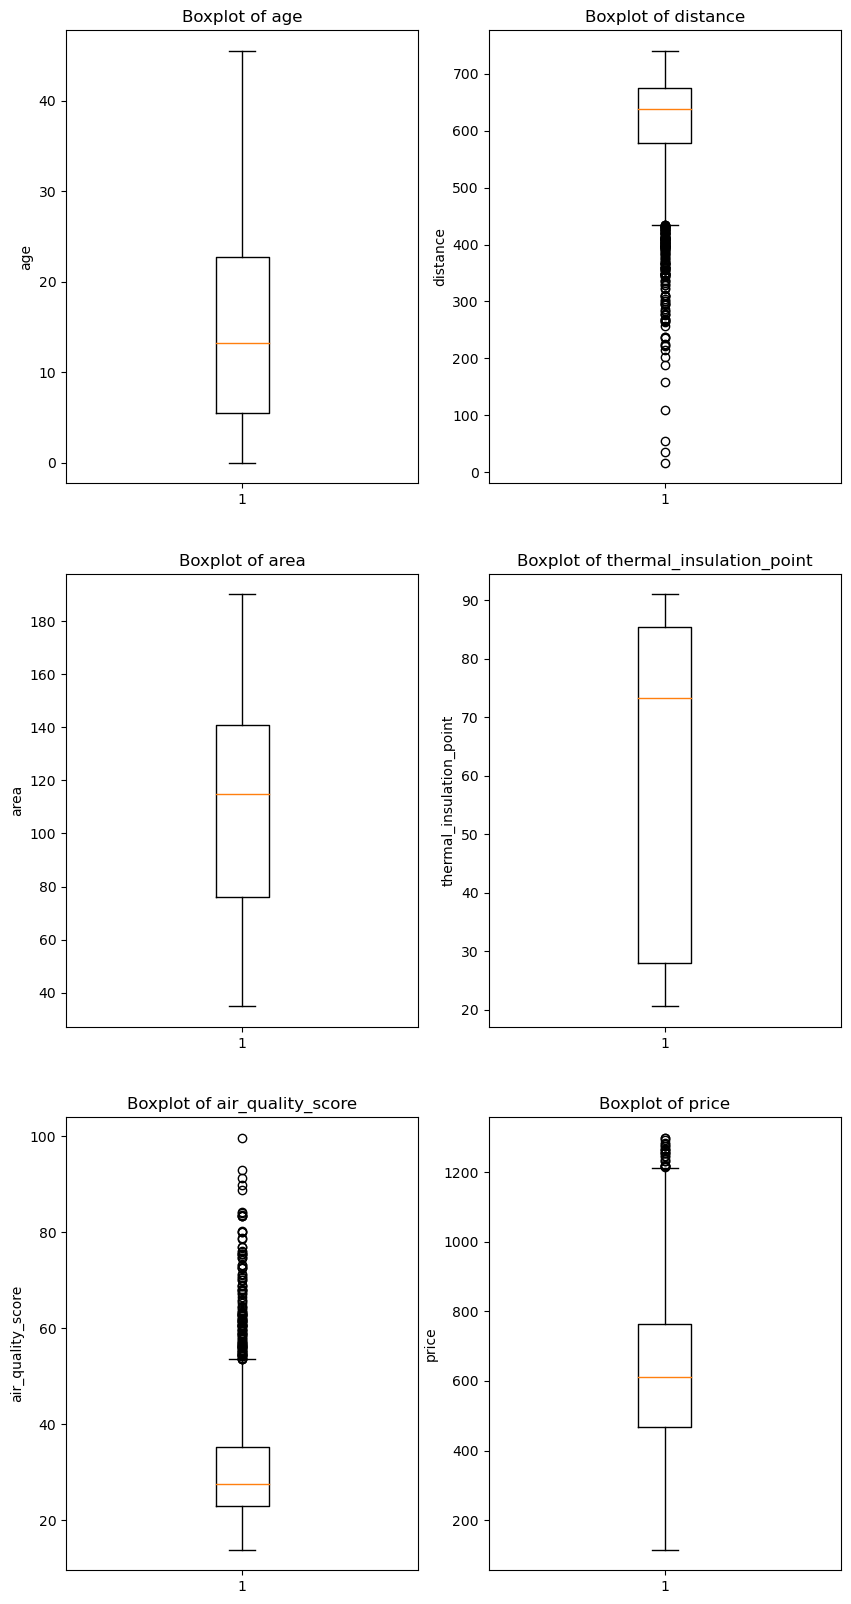

In [15]:
rows = 3
columns = 2
f, axes = plt.subplots(rows,columns, figsize=(10, 20))
numeric_cols = [col for col in data_wo_na.columns if col not in ["number_of_room", "neighbourhood", "material_quality" , "number_of_bathroom"]]
count=0
for i in range(rows):
    for j in range(columns): 
        col = numeric_cols[count]
        axes[i,j].set_title(f"Boxplot of {col}")
        axes[i,j].set_ylabel(col)
        axes[i,j].boxplot(data_wo_na.loc[:,col])
        count=count+1 
plt.show()

**Answer**  

Looking at both histogram and boxplot of each attribute, we can say that numeric attributes are not similar to the normal distribution. Maybe the most similar atribute to the normal distribution is **price** column.

**age**, **area**, and **thermal_insulation_point** have two peaks.

**11. For categoric attributes draw countplots and briefly comment on them.**  
Hint: You can use seaborn library. Please see the documentation via https://seaborn.pydata.org/api.html.

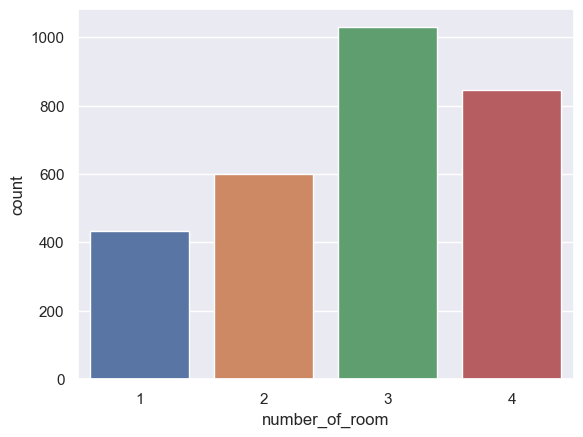

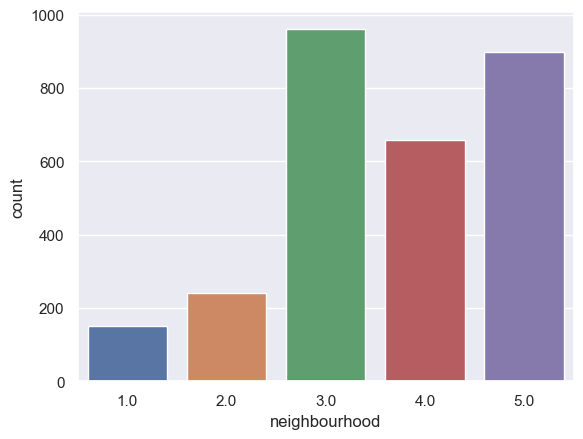

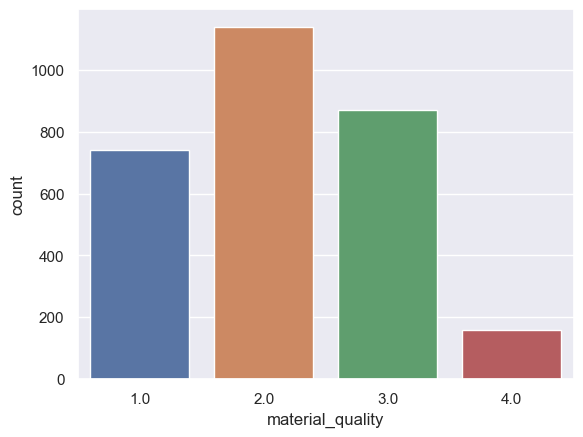

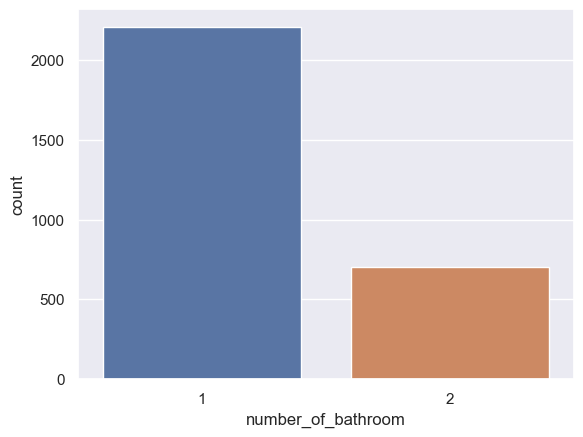

In [16]:
# answer
# Some of these atributes originally may have numeric value such as number_of_room and number_of_bathroom. 
# But we can accept them as categorical value since they don't have different values.
categorical_cols = ["number_of_room", "neighbourhood", "material_quality" , "number_of_bathroom"]

sns.set_theme(style="darkgrid")
for col in categorical_cols:
    ax = sns.countplot(x=col, data=data_wo_na)
    plt.axes(ax)
    plt.show()

**Double click and write your explanations and comments here.**

**12. Determine the appropriate descriptive location measure for each of the numerical attributes.**

**Answer**

The appropriate descriptive location measure should show the central tendency of the data. Therefore looking at histogram of the numeric attributes we can say:

 - **age** : median or mean (mode may not show the central tendency)
 - **distance** : mode, median or mean may show the central tendency (mean is best) 
 - **area** : median or mean (mode may not show the central tendency)
 - **thermal_insulation_point** : median or mean (mode may not show the central tendency)
 - **air_quality_score** : mode, median or mean may show the central tendency (mean is best) 
 - **price** : mode, median or mean may show the central tendency 

We have houses which are mostly in the moderate neighborhood. Also, houses generally have B material quality. It is good we have lower very low and low neighboorhood houses than the others.

**13. Find out whether there are any outliers and make one suggestion regarding how to deal with them.**

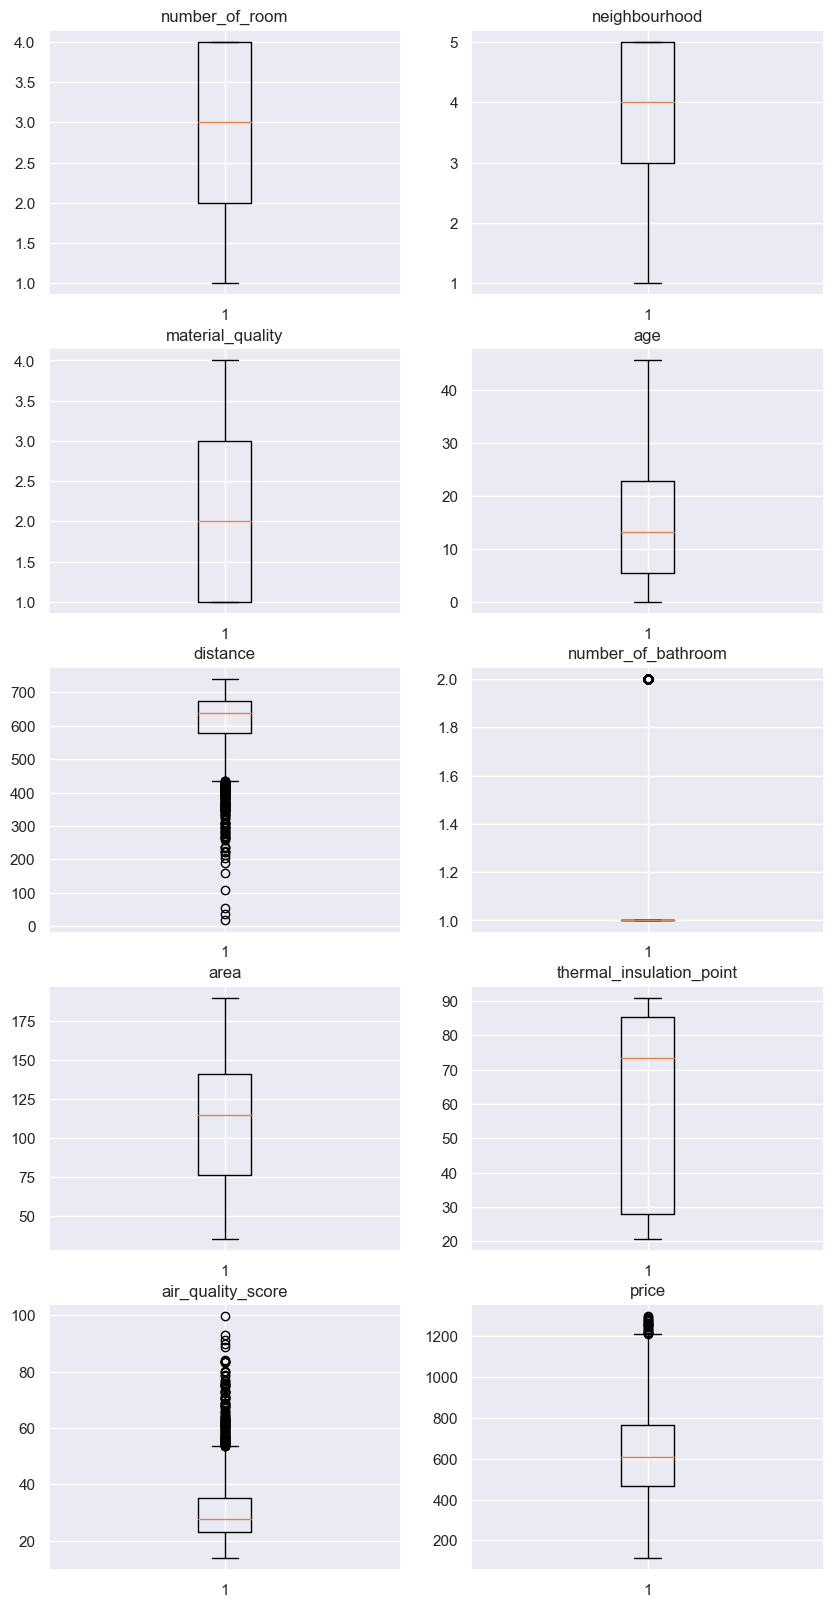

In [17]:
### answer ###
rows=5
columns=2
f, axes = plt.subplots(rows,columns, figsize=(10, 20))
count=0
for i in range(rows):
    for j in range(columns): 
        axes[i,j].set_title(data_wo_na.columns[count])
#         axes[i,j].hist(data_wo_na.iloc[:,count])
        axes[i,j].boxplot(data_wo_na.iloc[:,count])
        count=count+1  
plt.show()

**Double click and write your explanations and comments here.**

We have outliers for **distance**, **air_score_quality** and **price** columns. In box plot we see outlier in **number_of_bathroom** column as well but it is not. Since **number_of_bathroom** column has only two different values.

> As a suggestion, we can remove the outlier data which is outside of the (Q1 - 1.5IQR, Q3 + 1.5IQR)

**14. Visualize the distributions of all numeric attributes grouped by the "number_of_room" variable using violin plots. Comment on the results.**  
Hint: Please see the seaborn library documentation via https://seaborn.pydata.org/api.html.

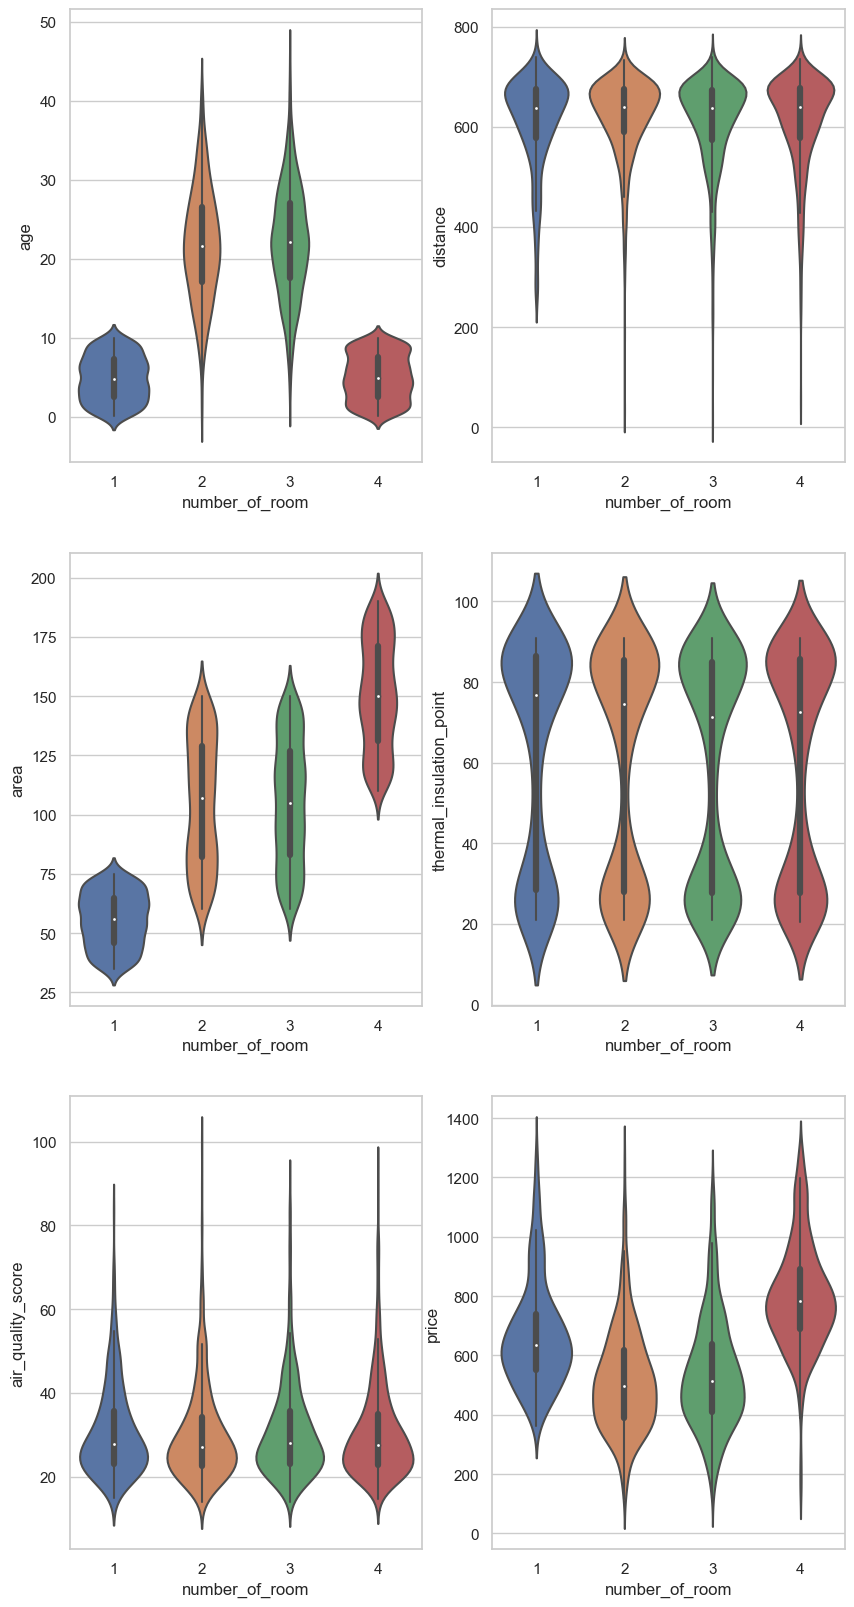

In [18]:
sns.set_theme(style="whitegrid")
# for col in numeric_cols:
#     if col == 'number_of_room':
#         continue
    
#     ax = sns.violinplot(x='number_of_room', y=col,  data=data_wo_na)
#     plt.show()
    

rows=3
columns=2
f, axes = plt.subplots(rows,columns, figsize=(10, 20))
numeric_cols = [col for col in numeric_cols if col not in ["number_of_room"]]
count=0
for i in range(rows):
    for j in range(columns):
        if count == len(numeric_cols):
            break
        col = numeric_cols[count]
        sns.violinplot(x='number_of_room', y=col,  data=data_wo_na, ax=axes[i,j])
        count=count+1  
plt.show()

**Answer**

For house with 2 or 3 rooms, we have more dispersion in the age of house. Dispersion of **distance** are nearly same for all houses. There are 2 bathrooms for the house with only 4 rooms. **area** increses when the **number_of_room** increases. This makes sense. **thermal_insulation_point** and **air_quality_score** have no relation with **number_of_room**. House with 4 rooms generally have more price than the others. However, interestingly, 2 rooms houses are a little more expensive than houses with 2 or 3 rooms.

**15. What does the below violin plot show? Explain.**

In [19]:
### answer ###
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="neighbourhood",y="price", hue="number_of_bathroom",  data=data_wo_na, palette="muted", split=True)


**Answer**

House with 2 bathrooms are only in moderate, high and very high neigboorhoods. In addition, houses with 2 bathrooms are generally more expensive (mean) than houses with 1 bathroom. Furthermore, generally price increses as neighboorhood goes to very high. All these make sense.

**16. Let's first create an array which has an exponential distribution. The code below is an example, you can change the parameters as you want or leave it as is.**

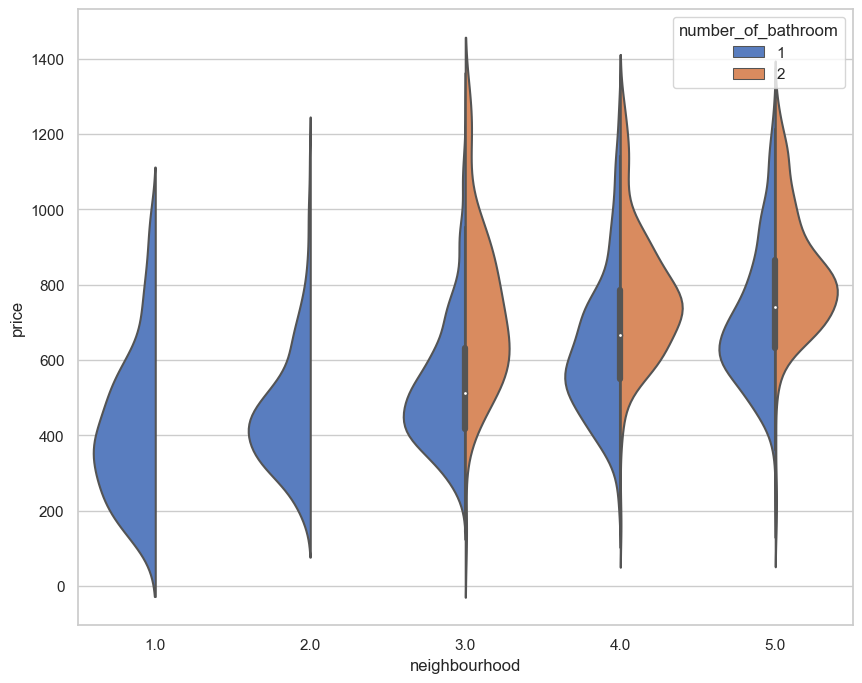

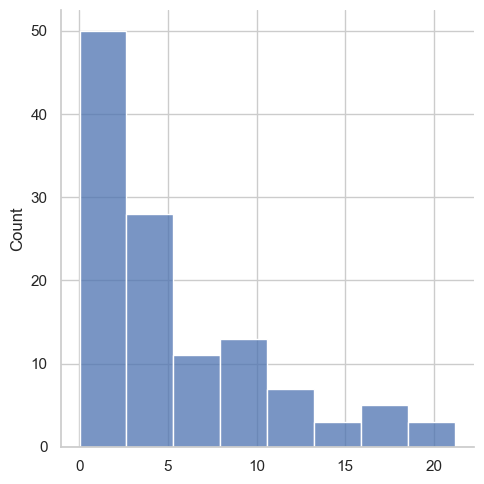

In [20]:
np.random.seed(5) # for reproducibility
array= np.random.exponential(scale=5,size=120)
sns.displot(array)
plt.show()

take_samples_from_given_data_calculate_mean: This function takes a sample from the given data with the specified sample size, then calculates the mean of this sample.
For example, take_samples_from_given_data_calculate_mean(array,3) it takes three elements of the array randomly and calculates the mean of them.
Let's take samples from array n=10 times and visualize the distribution of the means of these samples.


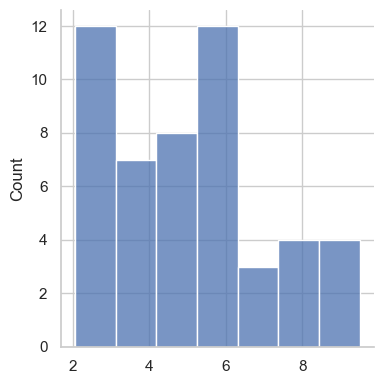

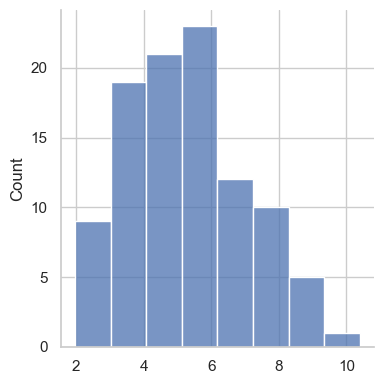

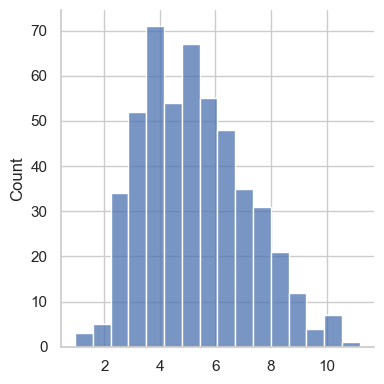

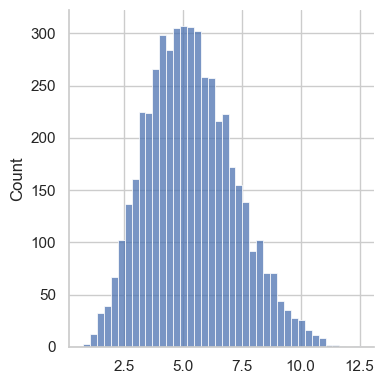

In [21]:
def take_samples_from_given_data_calculate_mean(data, sample_size):
    sample=np.random.choice(data,sample_size, replace=False)
    return np.mean(sample)
for n in [50, 100, 500, 5000]:
    samples_mean_list=[]
    for i in range (n):
        samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
    sns.displot(samples_mean_list,  height=4)
    plt.show()

Now repeat this visualization step for  n=50, n=100, n=500 and n=5000 and comment on your findings.

In [22]:
# answer
population_mean = np.mean(array)
print(f"Population Mean : {population_mean}")

Population Mean : 5.32052006764865


**Answer**

As *n* increases peak of distribution or mean of distribution approaches the true mean of the population. If we take more sample then average of the mean of the samples will approach the population mean. This is called as **Law of Large Number**.